### Analysing tabular data with Pandas

- Reading a CSV file into a Pandas data frame
- Retrieving data from Pandas data frames
- Querying, sorting, and analyzing data
- Merging, grouping, and aggregation of data
- Extracting useful information from dates
- Basic plotting using line and bar charts
- Writing data frames to CSV files
- Source: jovian.com

In [1]:
# Download Data using urlretrieve

In [2]:
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1fefd232f90>)

In [4]:
import pandas as pd

In [5]:
covid_df = pd.read_csv('italy-covid-daywise.csv') # Read data from a CSV file into a Pandas DataFrame object

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df


,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [9]:
covid_df.columns # Display list of columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [10]:
covid_df.shape # get the number of rows and columnsas a tuple

(248, 4)

In [11]:
covid_df.describe() # Descriptive Statistical information about numeric columns

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [12]:
# Retrieve the data
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [13]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [14]:
# Retrieve the specific value using indexing notation
covid_df['new_cases'][243]

1444.0

In [15]:
covid_df['new_tests'][245]

54395.0

In [16]:
covid_df.at[245, 'new_tests'] # using .at method

54395.0

In [17]:
cases_df = covid_df[['date', 'new_deaths']]
cases_df

,date,new_deaths
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1.0
244,2020-08-31,4.0
245,2020-09-01,6.0
246,2020-09-02,8.0


In [18]:
# Access to specific row to get info
covid_df.loc[245]

date          2020-09-01
new_cases          996.0
new_deaths           6.0
new_tests        54395.0
Name: 245, dtype: object

In [19]:
#  New_tests column contain NaN values. Finding the first index that doesn't contain a NaN value 
# using a column's first_valid_index method.
covid_df.new_tests.first_valid_index()

111

In [20]:
# Verifying few before and after rows
covid_df.loc[105:115]

,date,new_cases,new_deaths,new_tests
105,2020-04-14,3153.0,564.0,NaN
106,2020-04-15,2972.0,604.0,NaN
107,2020-04-16,2667.0,578.0,NaN
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0


In [21]:
# using the .sample method to retrieve a random sample of rows from the data frame.
covid_df.sample(15)

,date,new_cases,new_deaths,new_tests
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
131,2020-05-10,1083.0,194.0,31384.0
147,2020-05-26,300.0,92.0,33944.0
107,2020-04-16,2667.0,578.0,NaN
179,2020-06-27,255.0,30.0,29721.0
62,2020-03-02,561.0,6.0,NaN
237,2020-08-24,1209.0,7.0,33358.0
218,2020-08-05,190.0,5.0,29739.0
103,2020-04-12,4694.0,619.0,NaN


###  Analyzing data from data frames

In [22]:
# Sum of total cases
total_cases = covid_df.new_cases.sum()

In [23]:
print('The number of reported cases is:{}'.format(int(total_cases)))

The number of reported cases is:271515


In [24]:
total_deaths = covid_df.new_deaths.sum()
print('The number of reported death is:{}'.format(int(total_deaths)))

The number of reported death is:35497


In [25]:
# Death rate
death_rate = total_deaths / total_cases 
print(" Overall reported death rate is: {:.2f}%".format(death_rate *100))

 Overall reported death rate is: 13.07%


In [26]:
# Querying and sorting rows -> days reported higher than 1000
high_cases_df = covid_df[covid_df.new_cases > 1000]
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [27]:
# Display all the rows from dataframe using option_context method
from IPython.display import display
with pd.option_context('display.max_rows', 80):
    display(covid_df[covid_df.new_cases > 1000])


,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [28]:
# Sotring the rows using the column values
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [29]:
#The data type of date column is currently object. Convert it into a datetime column using the pd.to_datetime method.
covid_df['date'] = pd.to_datetime(covid_df.date)

In [30]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [31]:
# Extracting different parts of the data into separate columns, using the DatetimeIndex class
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [32]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [33]:
# Add a new column to the data frame.
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [34]:
covid_df


,date,new_cases,new_deaths,new_tests,year,month,day,weekday,positive_rate
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,NaN
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,0.026970
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,0.032055
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,0.018311
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,NaN


In [35]:
# Remove the newly added column
covid_df.drop(columns=['positive_rate'])

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [36]:
# Query the rows for month of June
covid_df_june = covid_df[covid_df.month == 6]
covid_df_june

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,positive_rate
153,2020-06-01,355.0,75.0,18053.0,2020,6,1,0,0.019664
154,2020-06-02,178.0,60.0,25628.0,2020,6,2,1,0.006946
155,2020-06-03,318.0,55.0,20035.0,2020,6,3,2,0.015872
156,2020-06-04,321.0,71.0,27451.0,2020,6,4,3,0.011694
157,2020-06-05,177.0,88.0,40470.0,2020,6,5,4,0.004374
158,2020-06-06,518.0,85.0,34036.0,2020,6,6,5,0.015219
159,2020-06-07,270.0,72.0,27894.0,2020,6,7,6,0.009680
160,2020-06-08,197.0,53.0,16301.0,2020,6,8,0,0.012085
161,2020-06-09,280.0,65.0,32200.0,2020,6,9,1,0.008696
162,2020-06-10,283.0,79.0,37865.0,2020,6,10,2,0.007474


In [37]:
# Aggregated results for the month of June
covid_df[covid_df.month == 6][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       7772.0
new_deaths      1404.0
new_tests     830354.0
dtype: float64

In [38]:
# Grouping and Aggregation of data

In [39]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [40]:
# Merging data from multiple sources
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1fefef3eed0>)

In [41]:
locations_df = pd.read_csv('locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [42]:
locations_df[locations_df.location == "Bangladesh"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
15,Bangladesh,Asia,164689383.0,72.59,0.8,3523.984


In [43]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [44]:
# Adding "location" column to covid_df
covid_df['location'] = "Italy"
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,positive_rate,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,0.026970,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,0.032055,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,0.018311,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,NaN,Italy


In [45]:
# Adding the columns from locations_df into covid_df using the .merge method.
merged_df = covid_df.merge(locations_df, on = "location")

In [46]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,positive_rate,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,0.026970,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,0.032055,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,0.018311,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


### Plotting with Pandas

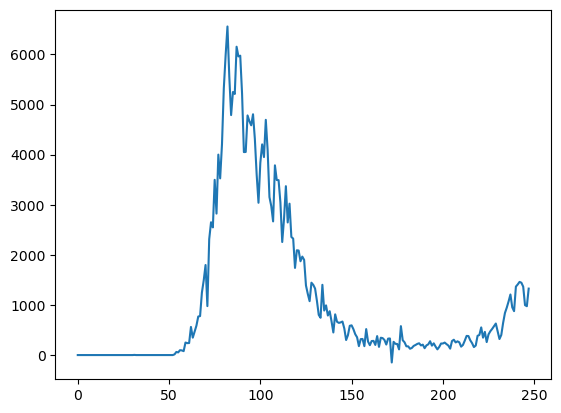

In [47]:
# Plot a line graph showing how the number of daily cases varies over time.
covid_df.new_cases.plot();

In [49]:
covid_df.set_index('date', inplace = True)
covid_df

,new_cases,new_deaths,new_tests,year,month,day,weekday,positive_rate,location
date,,,,,,,,,
2019-12-31,0.0,0.0,NaN,2019,12,31,1,NaN,Italy
2020-01-01,0.0,0.0,NaN,2020,1,1,2,NaN,Italy
2020-01-02,0.0,0.0,NaN,2020,1,2,3,NaN,Italy
2020-01-03,0.0,0.0,NaN,2020,1,3,4,NaN,Italy
2020-01-04,0.0,0.0,NaN,2020,1,4,5,NaN,Italy
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,0.026970,Italy
2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,0.032055,Italy
2020-09-01,996.0,6.0,54395.0,2020,9,1,1,0.018311,Italy


In [50]:
# Date as the index allows us to get the data for a specific data using .loc.
covid_df.loc['2020-09-01']

new_cases           996.0
new_deaths            6.0
new_tests         54395.0
year                 2020
month                   9
day                     1
weekday                 1
positive_rate    0.018311
location            Italy
Name: 2020-09-01 00:00:00, dtype: object

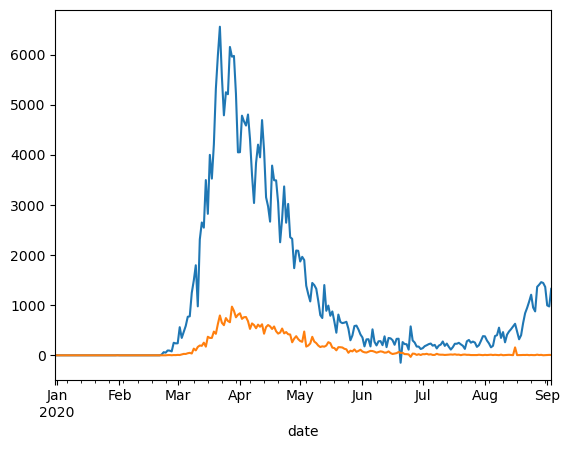

In [51]:
# Comparision
covid_df.new_cases.plot()
covid_df.new_deaths.plot();

In [ ]:
# Plot month-wise data using a bar chart to visualize the trend at a higher level.

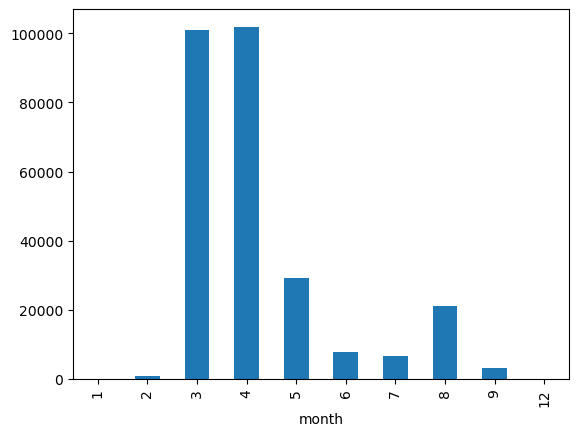

In [53]:
covid_month_df.new_cases.plot(kind='bar');

<Axes: xlabel='month'>

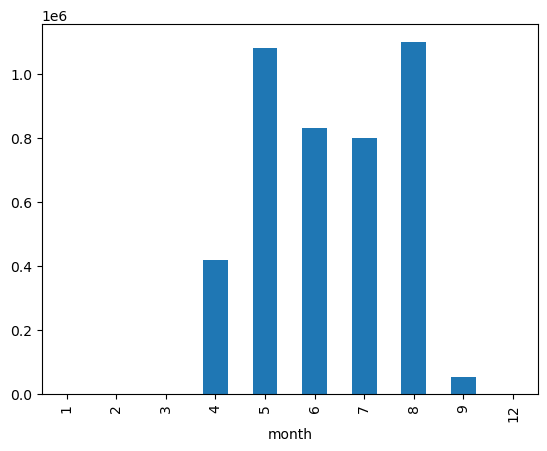

In [54]:
covid_month_df.new_tests.plot(kind='bar')